## Introduction

---

This notebook explores the **Marketing Campaign Performance Dataset**, which provides valuable insights into the effectiveness of various marketing campaigns. The dataset contains information about campaign types, target audience, duration, channels used, conversion rates, acquisition costs, ROI, locations, languages, clicks, impressions, engagement scores, customer segments, and dates.

For more information on the attributes visit [here](https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset/data).

The objective of this analysis is to uncover valuable insights regarding various advertising efforts from different channels. **The outcome of this analysis will help in optimizing campaigns and drive targeted growth.**

📌   Please keep in mind that, The dataset used in this analysis is fictional but representative of real-world marketing campaign data.


***Let's begin the analysis by loading the dataset and performing some initial exploration.***

## 📚 Importing Libraries & Data

---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("marketing_campaign_dataset.csv")

print("Number of datapoints:", len(df))

Number of datapoints: 200000


## 📃 Basic Analysis

---

In [3]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [4]:
df.tail()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10
199999,200000,Innovate Industries,Social Media,Women 35-44,45 days,Google Ads,0.01,"$13,835.00",6.64,Chicago,Spanish,924,7287,8,Tech Enthusiasts,2021-12-11


**➼ From the given DataFrame above, we will only analyze the "Alpha Innovations" Company from 'Company' column!**

In [5]:
df = df[df["Company"] == "Alpha Innovations"].reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40051 entries, 0 to 40050
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       40051 non-null  int64  
 1   Company           40051 non-null  object 
 2   Campaign_Type     40051 non-null  object 
 3   Target_Audience   40051 non-null  object 
 4   Duration          40051 non-null  object 
 5   Channel_Used      40051 non-null  object 
 6   Conversion_Rate   40051 non-null  float64
 7   Acquisition_Cost  40051 non-null  object 
 8   ROI               40051 non-null  float64
 9   Location          40051 non-null  object 
 10  Language          40051 non-null  object 
 11  Clicks            40051 non-null  int64  
 12  Impressions       40051 non-null  int64  
 13  Engagement_Score  40051 non-null  int64  
 14  Customer_Segment  40051 non-null  object 
 15  Date              40051 non-null  object 
dtypes: float64(2), int64(4), object(10)
memo

In [7]:
df.shape

(40051, 16)

From the data above, we can observe the following:

•There are no missing values.                                                                                                   
•There are 16 columns and 40051 rows.

In [8]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

## 🛠️ Data Preprocessing

---

In [9]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
1,9,Alpha Innovations,Social Media,Women 35-44,15 days,Facebook,0.09,"$18,066.00",6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2021-01-09
2,18,Alpha Innovations,Influencer,Men 18-24,15 days,Instagram,0.14,"$9,485.00",4.48,Miami,French,218,9264,9,Health & Wellness,2021-01-18
3,19,Alpha Innovations,Social Media,Men 25-34,60 days,Google Ads,0.07,"$19,224.00",6.08,New York,French,182,5798,1,Foodies,2021-01-19
4,27,Alpha Innovations,Email,Women 25-34,45 days,Facebook,0.09,"$9,182.00",6.03,Houston,English,953,6916,5,Fashionistas,2021-01-27


---

**➼ We decide to change the Company "Alpha Innovations" to "Skroutz", because this is the company we would like to work!**

---

In [10]:
# Replacing "Alpha Innovations" with "Skroutz" in 'Company' column.

df['Company'] = df['Company'].replace('Alpha Innovations', 'Skroutz')

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,3,Skroutz,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
1,9,Skroutz,Social Media,Women 35-44,15 days,Facebook,0.09,"$18,066.00",6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2021-01-09
2,18,Skroutz,Influencer,Men 18-24,15 days,Instagram,0.14,"$9,485.00",4.48,Miami,French,218,9264,9,Health & Wellness,2021-01-18
3,19,Skroutz,Social Media,Men 25-34,60 days,Google Ads,0.07,"$19,224.00",6.08,New York,French,182,5798,1,Foodies,2021-01-19
4,27,Skroutz,Email,Women 25-34,45 days,Facebook,0.09,"$9,182.00",6.03,Houston,English,953,6916,5,Fashionistas,2021-01-27


In [11]:
# Convert 'Date' column to datetime format.

df["Date"] = pd.to_datetime(df["Date"])

***Also we will change the year from 2021 to 2023, beacuase we do the analysis in 2024.***

In [12]:
# Function to change the year
def change_year(date, new_year):
    return date.replace(year=new_year)

# Apply the function to change the year from 2021 to 2024
df['Date'] = df['Date'].apply(lambda x: change_year(x, 2023))

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,3,Skroutz,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2023-01-03
1,9,Skroutz,Social Media,Women 35-44,15 days,Facebook,0.09,"$18,066.00",6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2023-01-09
2,18,Skroutz,Influencer,Men 18-24,15 days,Instagram,0.14,"$9,485.00",4.48,Miami,French,218,9264,9,Health & Wellness,2023-01-18
3,19,Skroutz,Social Media,Men 25-34,60 days,Google Ads,0.07,"$19,224.00",6.08,New York,French,182,5798,1,Foodies,2023-01-19
4,27,Skroutz,Email,Women 25-34,45 days,Facebook,0.09,"$9,182.00",6.03,Houston,English,953,6916,5,Fashionistas,2023-01-27


In [13]:
# Remove dollar sign and commas from 'Acquisition_Cost' column and convert it to float.

df["Acquisition_Cost"]=df["Acquisition_Cost"].str.replace("$","", regex = True).str.replace(",","", regex = True).astype(float)

In [14]:
print(f"Maximum value of Acquisition Cost is {df['Acquisition_Cost'].max()}$")
print("&")
print(f"Minimum value of Acquisition Cost is {df['Acquisition_Cost'].min()}$")

Maximum value of Acquisition Cost is 20000.0$
&
Minimum value of Acquisition Cost is 5000.0$


---

***So, we noticed that the numbers were extremely high for the metrics: Cost per Acquisition, Revenue etc. So we decided to lower to divide by 100, to have a more manageable data to analyze.***

---

In [15]:
# Divide 'Acquisition_Cost' by 100.

df["Acquisition_Cost"] = df["Acquisition_Cost"] / 100
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,3,Skroutz,Influencer,Men 25-34,30 days,YouTube,0.07,102.00,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2023-01-03
1,9,Skroutz,Social Media,Women 35-44,15 days,Facebook,0.09,180.66,6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2023-01-09
2,18,Skroutz,Influencer,Men 18-24,15 days,Instagram,0.14,94.85,4.48,Miami,French,218,9264,9,Health & Wellness,2023-01-18
3,19,Skroutz,Social Media,Men 25-34,60 days,Google Ads,0.07,192.24,6.08,New York,French,182,5798,1,Foodies,2023-01-19
4,27,Skroutz,Email,Women 25-34,45 days,Facebook,0.09,91.82,6.03,Houston,English,953,6916,5,Fashionistas,2023-01-27


In [16]:
# Convert 'Duration' column to numeric by extracting the number of days.

df["Duration"]=df["Duration"].str.replace(" days","", regex=True).astype("int64")

In [17]:
# Rename 'Duration' column to 'Durations_days' to remember that numbers in column are days.

df.rename(columns= {"Duration":"Duration_days"},inplace=True)
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration_days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,3,Skroutz,Influencer,Men 25-34,30,YouTube,0.07,102.00,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2023-01-03
1,9,Skroutz,Social Media,Women 35-44,15,Facebook,0.09,180.66,6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2023-01-09
2,18,Skroutz,Influencer,Men 18-24,15,Instagram,0.14,94.85,4.48,Miami,French,218,9264,9,Health & Wellness,2023-01-18
3,19,Skroutz,Social Media,Men 25-34,60,Google Ads,0.07,192.24,6.08,New York,French,182,5798,1,Foodies,2023-01-19
4,27,Skroutz,Email,Women 25-34,45,Facebook,0.09,91.82,6.03,Houston,English,953,6916,5,Fashionistas,2023-01-27


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40051 entries, 0 to 40050
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campaign_ID       40051 non-null  int64         
 1   Company           40051 non-null  object        
 2   Campaign_Type     40051 non-null  object        
 3   Target_Audience   40051 non-null  object        
 4   Duration_days     40051 non-null  int64         
 5   Channel_Used      40051 non-null  object        
 6   Conversion_Rate   40051 non-null  float64       
 7   Acquisition_Cost  40051 non-null  float64       
 8   ROI               40051 non-null  float64       
 9   Location          40051 non-null  object        
 10  Language          40051 non-null  object        
 11  Clicks            40051 non-null  int64         
 12  Impressions       40051 non-null  int64         
 13  Engagement_Score  40051 non-null  int64         
 14  Customer_Segment  4005

In [19]:
# Check for any missing values.

df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration_days       0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

**NO Missing Values!**

---

### Creating columns for further Marketing Analysis.

---

In [20]:
# Calculate the number of conversions using Conversion_Rate and Impressions.
df['Conversions'] = df['Conversion_Rate'] * df['Impressions']

# Calculate the total ad spend using Conversions and CPA (Acquisition Cost).
df['Total_Ad_Spend'] = df['Conversions'] * df['Acquisition_Cost']

# Calculate Revenue using the formula: Revenue = (ROI * Total Ad Spend) + Total Ad Spend.
df['Revenue'] = (df['ROI'] * df['Total_Ad_Spend']) + df['Total_Ad_Spend']

# Calculate ROAS using the formula: ROAS = Revenue / Total Ad Spend.
df['ROAS'] = df['Revenue'] / df['Total_Ad_Spend']

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration_days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Conversions,Total_Ad_Spend,Revenue,ROAS
0,3,Skroutz,Influencer,Men 25-34,30,YouTube,0.07,102.00,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2023-01-03,538.86,54963.7200,449603.229600,8.18
1,9,Skroutz,Social Media,Women 35-44,15,Facebook,0.09,180.66,6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2023-01-09,157.86,28518.9876,220451.774148,7.73
2,18,Skroutz,Influencer,Men 18-24,15,Instagram,0.14,94.85,4.48,Miami,French,218,9264,9,Health & Wellness,2023-01-18,1296.96,123016.6560,674131.274880,5.48
3,19,Skroutz,Social Media,Men 25-34,60,Google Ads,0.07,192.24,6.08,New York,French,182,5798,1,Foodies,2023-01-19,405.86,78022.5264,552399.486912,7.08
4,27,Skroutz,Email,Women 25-34,45,Facebook,0.09,91.82,6.03,Houston,English,953,6916,5,Fashionistas,2023-01-27,622.44,57152.4408,401781.658824,7.03


In [21]:
# Format the numbers to be more user-friendly.
df['Conversions'] = df['Conversions'].apply(lambda x: f"{x:.2f}")
df['Total_Ad_Spend'] = df['Total_Ad_Spend'].apply(lambda x: f"{x:.2f}")
df['Revenue'] = df['Revenue'].apply(lambda x: f"{x:.2f}")
df['ROAS'] = df['ROAS'].apply(lambda x: f"{x:.2f}")

# Setting display options to avoid scientific notation.
pd.set_option('display.float_format', '{:.2f}'.format)

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration_days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Conversions,Total_Ad_Spend,Revenue,ROAS
0,3,Skroutz,Influencer,Men 25-34,30,YouTube,0.07,102.00,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2023-01-03,538.86,54963.72,449603.23,8.18
1,9,Skroutz,Social Media,Women 35-44,15,Facebook,0.09,180.66,6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2023-01-09,157.86,28518.99,220451.77,7.73
2,18,Skroutz,Influencer,Men 18-24,15,Instagram,0.14,94.85,4.48,Miami,French,218,9264,9,Health & Wellness,2023-01-18,1296.96,123016.66,674131.27,5.48
3,19,Skroutz,Social Media,Men 25-34,60,Google Ads,0.07,192.24,6.08,New York,French,182,5798,1,Foodies,2023-01-19,405.86,78022.53,552399.49,7.08
4,27,Skroutz,Email,Women 25-34,45,Facebook,0.09,91.82,6.03,Houston,English,953,6916,5,Fashionistas,2023-01-27,622.44,57152.44,401781.66,7.03


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40051 entries, 0 to 40050
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campaign_ID       40051 non-null  int64         
 1   Company           40051 non-null  object        
 2   Campaign_Type     40051 non-null  object        
 3   Target_Audience   40051 non-null  object        
 4   Duration_days     40051 non-null  int64         
 5   Channel_Used      40051 non-null  object        
 6   Conversion_Rate   40051 non-null  float64       
 7   Acquisition_Cost  40051 non-null  float64       
 8   ROI               40051 non-null  float64       
 9   Location          40051 non-null  object        
 10  Language          40051 non-null  object        
 11  Clicks            40051 non-null  int64         
 12  Impressions       40051 non-null  int64         
 13  Engagement_Score  40051 non-null  int64         
 14  Customer_Segment  4005

In [23]:
# Convert 'Revenue', 'ROAS', 'Conversions', 'Total_Ad_Spend' columns to numeric format.
df["Revenue"]=pd.to_numeric(df["Revenue"])
df["ROAS"]=pd.to_numeric(df["ROAS"])
df["Conversions"]=pd.to_numeric(df["Conversions"])
df["Total_Ad_Spend"]=pd.to_numeric(df["Total_Ad_Spend"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40051 entries, 0 to 40050
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campaign_ID       40051 non-null  int64         
 1   Company           40051 non-null  object        
 2   Campaign_Type     40051 non-null  object        
 3   Target_Audience   40051 non-null  object        
 4   Duration_days     40051 non-null  int64         
 5   Channel_Used      40051 non-null  object        
 6   Conversion_Rate   40051 non-null  float64       
 7   Acquisition_Cost  40051 non-null  float64       
 8   ROI               40051 non-null  float64       
 9   Location          40051 non-null  object        
 10  Language          40051 non-null  object        
 11  Clicks            40051 non-null  int64         
 12  Impressions       40051 non-null  int64         
 13  Engagement_Score  40051 non-null  int64         
 14  Customer_Segment  4005

In [24]:
# Calculate the CTR and create a new column with CTR.

df['CTR'] = (df['Clicks'] / df['Impressions']) * 100

In [25]:
#Checking if engagement score represents the CTR 
#Compare Calculated_CTR with Engagement_Score to determine if they are the same.
comparison = df[['Engagement_Score', 'CTR']]

#Check if Engagement_Score is approximately equal to Calculated_CTR
comparison['Is_CTR'] = comparison['Engagement_Score'].round(2) == comparison['CTR'].round(2)

#Display the comparison
print(comparison.head(10))

   Engagement_Score   CTR  Is_CTR
0                 1  7.59   False
1                 6 49.09   False
2                 9  2.35   False
3                 1  3.14   False
4                 5 13.78   False
5                 4  4.25   False
6                 1 12.97   False
7                 6  4.77   False
8                 7 15.07   False
9                 8  2.99   False


C:\Users\User\AppData\Local\Temp\ipykernel_26240\1059456264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison['Is_CTR'] = comparison['Engagement_Score'].round(2) == comparison['CTR'].round(2)


**So the Engagement Score is not the same with CTR**

In [26]:
# Adding a new column 'Quarter' for further segmentation.
def get_quarter(date):
    if date >= pd.Timestamp("2021-01-01") and date <= pd.Timestamp("2023-03-31"):
        return "Q1"
    elif date >= pd.Timestamp("2021-04-01") and date <= pd.Timestamp("2023-06-30"):
        return "Q2"
    elif date >= pd.Timestamp("2021-07-01") and date <= pd.Timestamp("2023-09-30"):
        return "Q3"
    else:
        return "Q4"

# Apply the function to the 'Date' column.
df.loc[:, "Quarter"] = df["Date"].apply(get_quarter)

In [27]:
# Created a new column 'Attribution_Model' and assign the attribution model based on 'Channel_Used'.
df['Attribution_Model'] = df['Channel_Used'].apply(lambda x: 
    'First Click Attribution' if x == 'Email' else
    'Data Driven Attribution' if x in ['Google Ads', 'Website'] else
    'Last Click Attribution' if x in ['YouTube', 'Instagram', 'Facebook'] else
    'Unknown Attribution')

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration_days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Engagement_Score,Customer_Segment,Date,Conversions,Total_Ad_Spend,Revenue,ROAS,CTR,Quarter,Attribution_Model
0,3,Skroutz,Influencer,Men 25-34,30,YouTube,0.07,102.00,7.18,Los Angeles,...,1,Outdoor Adventurers,2023-01-03,538.86,54963.72,449603.23,8.18,7.59,Q1,Last Click Attribution
1,9,Skroutz,Social Media,Women 35-44,15,Facebook,0.09,180.66,6.73,Chicago,...,6,Tech Enthusiasts,2023-01-09,157.86,28518.99,220451.77,7.73,49.09,Q1,Last Click Attribution
2,18,Skroutz,Influencer,Men 18-24,15,Instagram,0.14,94.85,4.48,Miami,...,9,Health & Wellness,2023-01-18,1296.96,123016.66,674131.27,5.48,2.35,Q1,Last Click Attribution
3,19,Skroutz,Social Media,Men 25-34,60,Google Ads,0.07,192.24,6.08,New York,...,1,Foodies,2023-01-19,405.86,78022.53,552399.49,7.08,3.14,Q1,Data Driven Attribution
4,27,Skroutz,Email,Women 25-34,45,Facebook,0.09,91.82,6.03,Houston,...,5,Fashionistas,2023-01-27,622.44,57152.44,401781.66,7.03,13.78,Q1,Last Click Attribution


In [28]:
# Rename the 'Acquisition_Cost' column to 'Cost_Per_Acquisition', because we need to remember the it's the CPA.

df.rename(columns={"Acquisition_Cost":"Cost_Per_Acquisition"}, inplace=True )

In [29]:
# We want to reorder the columns of the dataset to be more 'user friendly'.
desired_column_order = [
    "Campaign_ID", "Company", "Campaign_Type", "Channel_Used", "Total_Ad_Spend",
    "Cost_Per_Acquisition", "Impressions", "Clicks", "Engagement_Score", "Conversions",
    "Conversion_Rate","CTR", "ROI", "ROAS", "Revenue", "Attribution_Model", "Location",
    "Duration_days", "Date", "Quarter", "Language", "Target_Audience", "Customer_Segment"
]

# Reorder the columns.
df = df[desired_column_order]

df.head()

,Campaign_ID,Company,Campaign_Type,Channel_Used,Total_Ad_Spend,Cost_Per_Acquisition,Impressions,Clicks,Engagement_Score,Conversions,...,ROAS,Revenue,Attribution_Model,Location,Duration_days,Date,Quarter,Language,Target_Audience,Customer_Segment
0,3,Skroutz,Influencer,YouTube,54963.72,102.00,7698,584,1,538.86,...,8.18,449603.23,Last Click Attribution,Los Angeles,30,2023-01-03,Q1,French,Men 25-34,Outdoor Adventurers
1,9,Skroutz,Social Media,Facebook,28518.99,180.66,1754,861,6,157.86,...,7.73,220451.77,Last Click Attribution,Chicago,15,2023-01-09,Q1,German,Women 35-44,Tech Enthusiasts
2,18,Skroutz,Influencer,Instagram,123016.66,94.85,9264,218,9,1296.96,...,5.48,674131.27,Last Click Attribution,Miami,15,2023-01-18,Q1,French,Men 18-24,Health & Wellness
3,19,Skroutz,Social Media,Google Ads,78022.53,192.24,5798,182,1,405.86,...,7.08,552399.49,Data Driven Attribution,New York,60,2023-01-19,Q1,French,Men 25-34,Foodies
4,27,Skroutz,Email,Facebook,57152.44,91.82,6916,953,5,622.44,...,7.03,401781.66,Last Click Attribution,Houston,45,2023-01-27,Q1,English,Women 25-34,Fashionistas


In [30]:
#Check the final columns of the dataset.

df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Channel_Used',
       'Total_Ad_Spend', 'Cost_Per_Acquisition', 'Impressions', 'Clicks',
       'Engagement_Score', 'Conversions', 'Conversion_Rate', 'CTR', 'ROI',
       'ROAS', 'Revenue', 'Attribution_Model', 'Location', 'Duration_days',
       'Date', 'Quarter', 'Language', 'Target_Audience', 'Customer_Segment'],
      dtype='object')

In [31]:
# Summary statistics.

df.describe()

,Campaign_ID,Total_Ad_Spend,Cost_Per_Acquisition,Impressions,Clicks,Engagement_Score,Conversions,Conversion_Rate,CTR,ROI,ROAS,Revenue,Duration_days
count,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00,40051.00
mean,99646.09,55175.86,125.14,5508.98,548.88,5.50,440.93,0.08,14.03,5.01,6.01,331482.91,37.52
std,57736.94,46879.75,43.35,2598.84,260.14,2.87,323.56,0.04,13.13,1.74,1.74,308717.08,16.70
min,3.00,588.39,50.00,1000.00,100.00,1.00,10.01,0.01,1.01,2.00,3.00,1882.86,15.00
25%,49536.00,19686.99,87.40,3254.00,323.00,3.00,176.70,0.04,5.86,3.50,4.50,110530.10,30.00
50%,99202.00,41121.28,125.50,5532.00,549.00,5.00,358.02,0.08,9.96,5.00,6.00,232714.05,45.00
75%,149659.00,77297.15,162.61,7741.50,773.00,8.00,643.60,0.12,16.92,6.51,7.51,452826.33,45.00
max,199987.00,292701.64,200.00,10000.00,1000.00,10.00,1498.50,0.15,99.20,8.00,9.00,2415337.54,60.00


In [32]:
# Unique values of 'Campaign_Type'.

campaign_values = df['Campaign_Type'].value_counts()
print("Total unique categories of Campaign Type column:\n", campaign_values)

Total unique categories of Campaign Type column:
 Email           8069
Influencer      8059
Social Media    8005
Search          7967
Display         7951
Name: Campaign_Type, dtype: int64


In [33]:
# Unique values of 'Target_Audience'.

target_audience_values = df['Target_Audience'].value_counts()
print("Total unique categories of Target Audience:\n", target_audience_values)

Total unique categories of Target Audience:
 All Ages       8077
Men 25-34      8063
Men 18-24      8025
Women 25-34    7965
Women 35-44    7921
Name: Target_Audience, dtype: int64


In [34]:
# Unique values of 'Channel_Used'.

channels_values = df['Channel_Used'].value_counts()
print("Total unique Channels Used:\n", channels_values)

Total unique Channels Used:
 Website       6762
Google Ads    6737
Instagram     6700
Email         6643
YouTube       6634
Facebook      6575
Name: Channel_Used, dtype: int64


In [35]:
# Unique values of 'Customer_Segment'.

customer_segments = df['Customer_Segment'].value_counts()
print("Total number of unique Customer Segments:\n", customer_segments)

Total number of unique Customer Segments:
 Tech Enthusiasts       8169
Foodies                8033
Health & Wellness      8019
Outdoor Adventurers    7973
Fashionistas           7857
Name: Customer_Segment, dtype: int64


In [36]:
# Unique values of 'Language'.

languages = df['Language'].value_counts()
print("Total number of unique Languages:", languages)

Total number of unique Languages: English     8146
Mandarin    8076
Spanish     7974
German      7938
French      7917
Name: Language, dtype: int64


---

***We are checking the distribution of the data.***

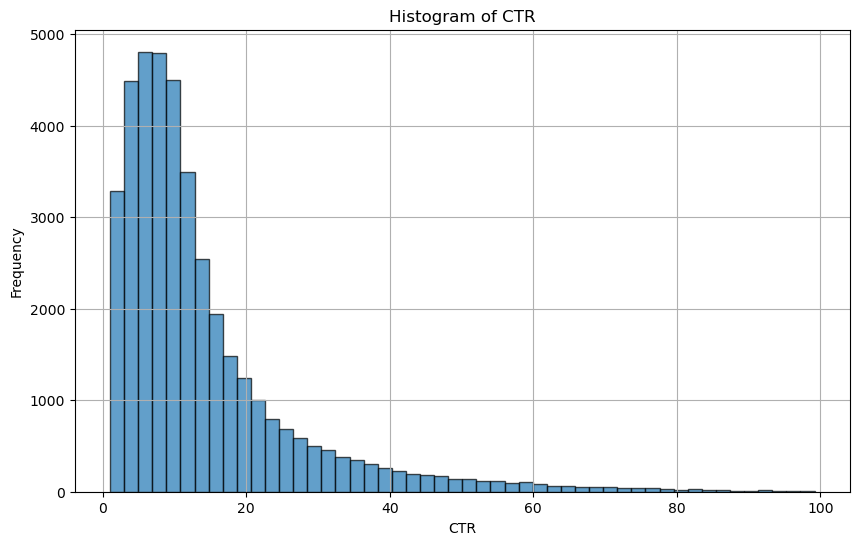

In [37]:
# Adjust the number of bins according to your data size for better visualization
num_bins = 50

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CTR'], bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of CTR')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

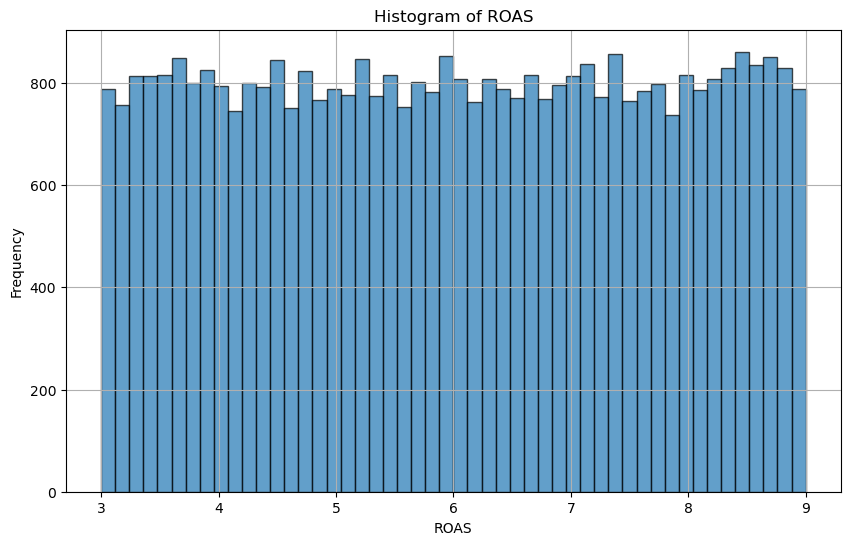

In [38]:
# Adjust the number of bins according to your data size for better visualization
num_bins = 50

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ROAS'], bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of ROAS')
plt.xlabel('ROAS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

***Since, the data follow skewed distribution, we will calculate from now on the Median value and not the Average!***

---

In [54]:
# Import the Workbook class from the openpyxl.workbook module.
from openpyxl.workbook import Workbook

# Export the DataFrame (df) to an Excel file named 'Alpha_Innovations_Dataset.xlsx' without including the index column.
df.to_excel('Alpha_Innovations_Dataset.xlsx',index=False)

## 📊 EDA

---

In [40]:
# Calculate the total sum of target audience.
total_sum = sum(target_audience_values)

# Calculate the sum of Women 25-34 and Men 25-34.
sum_women_men_25_34 = target_audience_values['Women 25-34'] + target_audience_values['Men 25-34']

# Calculate the percentage.
percentage_women_men_25_34 = (sum_women_men_25_34 / total_sum) * 100

# Print the result.
print(f"The percentage of Women 25-34 and Men 25-34 combined out of the total sum of target audience is: {percentage_women_men_25_34:.2f}%")

The percentage of Women 25-34 and Men 25-34 combined out of the total sum of target audience is: 40.02%


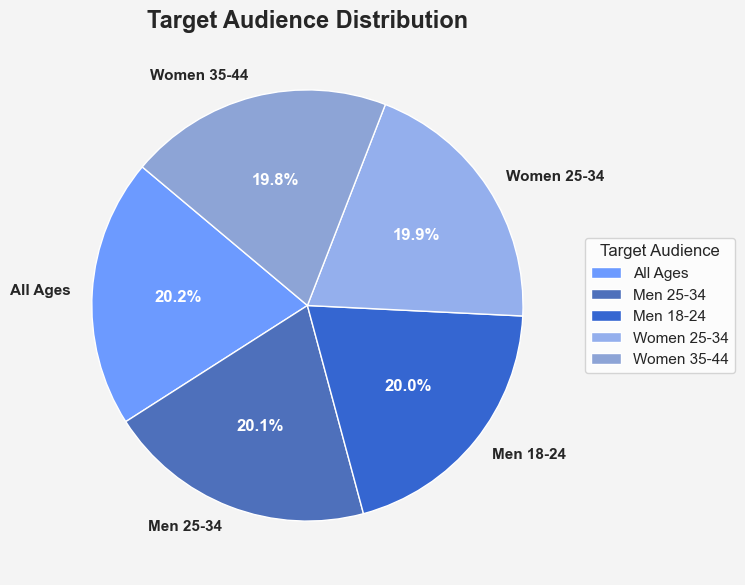

In [41]:
target_audience_values

# We set the style.
sns.set(style="whitegrid")

# Define a custom color palette with shades of blue and grey.
custom_colors = ['#6c9aff', '#4e70bb', '#3566d1', '#94afed', '#8da4d6']

# Create a pie chart.
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(
    target_audience_values,
    labels=target_audience_values.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors
)

# Customize the plot.
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=11, weight="bold")
ax.set_title('Target Audience Distribution', fontsize=17, weight="bold")

# Set background color.
fig.patch.set_facecolor('#f4f4f4')

# Add a legend.
ax.legend(wedges, target_audience_values.index, title="Target Audience", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot.
plt.show()

In [42]:
# We will find some metrics per 'Duration_days'.

df.groupby("Duration_days")[["ROAS", "CTR", "Revenue", "Total_Ad_Spend", "Cost_Per_Acquisition"]].median().reset_index()

,Duration_days,ROAS,CTR,Revenue,Total_Ad_Spend,Cost_Per_Acquisition
0,15,6.02,9.82,237924.45,41534.28,125.16
1,30,6.00,10.01,229875.59,41020.00,125.56
2,45,5.95,9.96,230308.34,41078.50,125.88
3,60,6.06,10.07,232121.49,40620.14,125.38


In [43]:
# Find the median 'ROAS' by 'Target Audience'.

df.groupby("Target_Audience")["ROAS"].median().sort_values(ascending = False).reset_index()

,Target_Audience,ROAS
0,All Ages,6.04
1,Men 25-34,6.03
2,Women 35-44,6.00
3,Men 18-24,5.98
4,Women 25-34,5.98


In [44]:
# Group by "Quarter" and calculate sum for "Revenue" and "Total_Ad_Spend".
df_audience = df.groupby("Target_Audience")[["Revenue", "Total_Ad_Spend"]].sum().reset_index()

# Calculate ROAS.
df_audience["ROAS"] = df_audience["Revenue"] / df_audience["Total_Ad_Spend"]

df_audience.sort_values(by = "ROAS", ascending = False, inplace = True)
df_audience.reset_index(drop=True, inplace=True)

# Display the new DataFrame.
df_audience

,Target_Audience,Revenue,Total_Ad_Spend,ROAS
0,Men 25-34,2669131984.67,442045021.14,6.04
1,All Ages,2671704250.29,443796730.31,6.02
2,Women 25-34,2640303556.41,439128882.91,6.01
3,Women 35-44,2653683255.37,443007654.71,5.99
4,Men 18-24,2641398937.84,441870240.83,5.98


In [45]:
# Group by "Quarter" and calculate sum for "Revenue" and "Total_Ad_Spend".
df_quarter = df.groupby("Quarter")[["Revenue", "Total_Ad_Spend"]].sum().reset_index()

# Calculate ROAS.
df_quarter["ROAS"] = df_quarter["Revenue"] / df_quarter["Total_Ad_Spend"]

# Display the new DataFrame.
df_quarter

,Quarter,Revenue,Total_Ad_Spend,ROAS
0,Q1,3274573573.92,547100643.27,5.99
1,Q2,3265860150.71,544929582.02,5.99
2,Q3,3313610056.24,551661266.77,6.01
3,Q4,3422178203.71,566157037.84,6.04


In [46]:
rev_per_quarter_and_location = df.groupby(["Quarter", "Location"])[["Revenue", "Total_Ad_Spend"]].sum().reset_index()

# Filter data for Q1 and Q2 and select only "Revenue" and "Total_Ad_Spend".
first_quarters = ["Q1", "Q2"]
q1_q2_data = rev_per_quarter_and_location[rev_per_quarter_and_location["Quarter"].isin(first_quarters)]

# Filter data for Q3 and Q4 and select only "Revenue" and "Total_Ad_Spend".
latest_quarters = ["Q3", "Q4"]
q3_q4_data = rev_per_quarter_and_location[rev_per_quarter_and_location["Quarter"].isin(latest_quarters)]

# Calculate total revenue for Q1 and Q2 by location.
total_revenue_q1_q2 = q1_q2_data["Revenue"].sum()

# Calculate total revenue for Q3 and Q4 by location.
total_revenue_q3_q4 = q3_q4_data["Revenue"].sum()

# Calculate the difference between Q4 and Q1.
difference = total_revenue_q3_q4 - total_revenue_q1_q2

# Calculate the percentage difference.
percentage_difference = (difference / total_revenue_q1_q2) * 100

# Display the percentage difference.
print("\nΤhe Revenue Increase from the first half of the year to the second half is:\n", percentage_difference.round(2), "%")


Τhe Revenue Increase from the first half of the year to the second half is:
 2.99 %


In [47]:
# rev_per_quarter_and_location = df.groupby(["Quarter", "Location"])[["Revenue", "Total_Ad_Spend"]].sum().reset_index().

# Filter data for Q1 and Q2 and select only "Revenue" and "Total_Ad_Spend".
first_quarters = ["Q1", "Q2"]
q1_q2_data = rev_per_quarter_and_location[rev_per_quarter_and_location["Quarter"].isin(first_quarters)]

# Filter data for Q3 and Q4 and select only "Revenue" and "Total_Ad_Spend".
latest_quarters = ["Q3", "Q4"]
q3_q4_data = rev_per_quarter_and_location[rev_per_quarter_and_location["Quarter"].isin(latest_quarters)]

# Calculate total revenue for Q1 and Q2 by location.
total_revenue_q1_q2 = q1_q2_data.groupby("Location")["Revenue"].sum()

# Calculate total revenue for Q3 and Q4 by location.
total_revenue_q3_q4 = q3_q4_data.groupby("Location")["Revenue"].sum()

# Merge the totals into a single DataFrame
revenue_comparison = pd.merge(total_revenue_q1_q2, total_revenue_q3_q4, on="Location", suffixes=('_Q1_Q2', '_Q3_Q4'))

# Calculate the difference between Q3/Q4 and Q1/Q2 by location.
revenue_comparison["Revenue_Increase"] = revenue_comparison["Revenue_Q3_Q4"] - revenue_comparison["Revenue_Q1_Q2"]

# Calculate the percentage difference by location.
revenue_comparison["Percentage_Increase"] = (revenue_comparison["Revenue_Increase"] / revenue_comparison["Revenue_Q1_Q2"]) * 100

# Sort values by Percentage_Increase descending.
merged_sorted = revenue_comparison.sort_values(by="Percentage_Increase", ascending=False)

# Display the results.
print("\nPercentage Revenue Increase from Q1/Q2 to Q3/Q4 by Location:")
print(merged_sorted.round(2))


Percentage Revenue Increase from Q1/Q2 to Q3/Q4 by Location:
             Revenue_Q1_Q2  Revenue_Q3_Q4  Revenue_Increase  \
Location                                                      
New York     1281779787.18  1377750198.50       95970411.32   
Houston      1320810986.23  1359994803.02       39183816.79   
Los Angeles  1318043840.63  1347892678.75       29848838.12   
Miami        1320813320.63  1345378629.14       24565308.51   
Chicago      1298985789.96  1304771950.54        5786160.58   

             Percentage_Increase  
Location                          
New York                    7.49  
Houston                     2.97  
Los Angeles                 2.26  
Miami                       1.86  
Chicago                     0.45  


In [48]:
# Revenue Performance by 'Location'.

df.groupby("Location")["Revenue"].sum().sort_values(ascending = False).reset_index()

,Location,Revenue
0,Houston,2680805789.25
1,Miami,2666191949.77
2,Los Angeles,2665936519.38
3,New York,2659529985.68
4,Chicago,2603757740.50


In [49]:
# Group by "Quarter" and "Location" and calculate sum for "Revenue" over the last two quarters (Q3 and Q4).
# rev_per_quarter_and_location

# Filter data for the last two quarters (Q3 and Q4).
latest_quarters = ["Q3", "Q4"]
filtered_data = rev_per_quarter_and_location[rev_per_quarter_and_location["Quarter"].isin(latest_quarters)]

# Calculate total revenue for each location over the last two quarter.
total_revenue = filtered_data.groupby("Location")["Revenue"].sum().reset_index()

# Find the location with the highest total revenue.
location_highest_revenue = total_revenue.loc[total_revenue["Revenue"].idxmax()]

# Display the location with the highest revenue over the last 6 months.
print(f"\nLocation with the Highest Revenue over the Last 6 Months: {location_highest_revenue['Location']} "
      f"with total revenue ${location_highest_revenue['Revenue']}")


Location with the Highest Revenue over the Last 6 Months: New York with total revenue $1377750198.5


In [50]:
# Group the data by 'Channel_Used' and calculate the median of 'CTR' and 'ROAS' for each group.
# Sort the resulting dataframe by 'ROAS' in descending order, then by 'CTR' in descending order.
# Reset the index of the sorted dataframe for easier readability.

df.groupby("Channel_Used")[["CTR", "ROAS"]].median().sort_values(by = ["ROAS", "CTR"], ascending = False).reset_index()

,Channel_Used,CTR,ROAS
0,Facebook,10.04,6.04
1,YouTube,9.89,6.03
2,Website,9.88,6.03
3,Email,10.14,6.01
4,Instagram,10.01,5.96
5,Google Ads,9.88,5.96


In [51]:
# Group the data by 'Campaign_Type' and calculate the median of 'CTR' and 'ROAS' for each group.
# Sort the resulting dataframe by 'ROAS' in descending order.
# Reset the index of the sorted dataframe for easier readability.
df.groupby("Campaign_Type")[["CTR", "ROAS"]].median().sort_values(by = "ROAS", ascending = False).reset_index()

,Campaign_Type,CTR,ROAS
0,Influencer,10.06,6.08
1,Search,9.89,6.03
2,Display,10.07,5.99
3,Email,9.80,5.97
4,Social Media,10.02,5.96


In [52]:
# Remind the count of Campaigns.
campaign_values

Email           8069
Influencer      8059
Social Media    8005
Search          7967
Display         7951
Name: Campaign_Type, dtype: int64

In [53]:
# The Net Profit after removing the Campaigns Budget.

df["Revenue"].sum() - df["Total_Ad_Spend"].sum()

11066373454.680002

---

## Conclusion💥

By leveraging the insights gained from this analysis, marketers and data analysts can refine their marketing strategies, optimize campaign performance, and drive targeted growth. The findings from this analysis can guide data-driven decision-making and support market research efforts.

***📌   It is important to note again that this analysis is based on a fictional dataset and should be further validated and customized based on the specific business context and objectives.***